## Logistic Regression

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

# Load your CSV data into a pandas DataFrame
df = pd.read_csv('../../data/tokenized_data.csv')

# Load the vectorized features from the .npy file
vectorized_features = np.load('../data_processing/vectorized_features.npy')

feature_vectors = pd.DataFrame(vectorized_features)

feature_vectors.columns = [f'vec_feature_{i}' for i in range(feature_vectors.shape[1])]

X = feature_vectors # Feature vector
y = df['overall']  # Target variable

# Split the data into training and testing sets
# Stratify by y to evenly distribute classes between test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Create 10-fold stratified cross-validation and create hyperparameter options
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Create a grid search with logistic regression
model = LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(model,grid,cv=kfold, scoring='accuracy', verbose=5)
logreg_cv.fit(X_train,y_train)


Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END ..............C=0.001, penalty=l1;, score=0.538 total time=   1.0s
[CV 2/10] END ..............C=0.001, penalty=l1;, score=0.540 total time=   0.7s
[CV 3/10] END ..............C=0.001, penalty=l1;, score=0.540 total time=   0.7s
[CV 4/10] END ..............C=0.001, penalty=l1;, score=0.538 total time=   0.7s
[CV 5/10] END ..............C=0.001, penalty=l1;, score=0.539 total time=   0.7s
[CV 6/10] END ..............C=0.001, penalty=l1;, score=0.541 total time=   0.7s
[CV 7/10] END ..............C=0.001, penalty=l1;, score=0.541 total time=   0.7s
[CV 8/10] END ..............C=0.001, penalty=l1;, score=0.540 total time=   0.8s
[CV 9/10] END ..............C=0.001, penalty=l1;, score=0.540 total time=   0.8s
[CV 10/10] END .............C=0.001, penalty=l1;, score=0.539 total time=   0.7s
[CV 1/10] END ..............C=0.001, penalty=l2;, score=0.557 total time=   1.3s
[CV 2/10] END ..............C=0.001, penalty=l

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=5)

LogisticRegression(C=10.0, penalty='l1', solver='liblinear')
{'C': 10.0, 'penalty': 'l1'}
Accuracy: 0.57085
[5. 5. 5. ... 5. 5. 5.]
66922    5.0
18194    5.0
83108    1.0
27252    5.0
29146    4.0
        ... 
14770    1.0
41504    2.0
61514    5.0
75191    1.0
31446    5.0
Name: overall, Length: 20000, dtype: float64


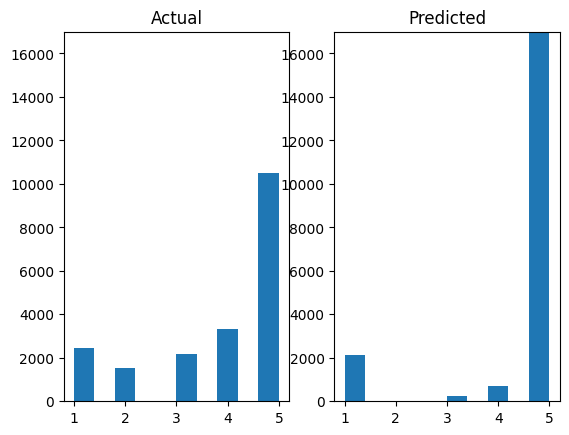

In [46]:
# Fit model with best parameters
print(logreg_cv.best_estimator_)
print(logreg_cv.best_params_)
model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
model.fit(X_train,y_train)

# Score the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

y_pred = model.predict(X_test)

# Create a histogram of the actual and predicted ratings
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 2)
x = np.linspace(0, 20, 20)
ax[0].set_ylim(0, 17000)
ax[1].set_ylim(0, 17000)
ax[0].hist(y_test)
ax[1].hist(y_pred)
ax[0].set_title('Actual')
ax[1].set_title('Predicted')

print(y_pred)
print(y_test)
